# What is Principal Component Analysis?

## Introduction

### Principal Component Analysis (PCA) is a statistical technique used to simplify complex datasets by reducing their dimensions. By transforming variables that are correlated into a smaller set of uncorrelated variables called principal components, PCA helps to reveal the underlying structure of the data. This reduction not only makes data visualization more manageable but also enhances the efficiency of subsequent analyses.

## How does Principal Component Analysis work?

### PCA works by identifying the directions (principal components) where the data varies the most.

1.   Standardization: data is standardized to ensure each variable contributes equally to the analysis
2.   Covariance Matrix Computation: covariance matrix is computed to understand how variables in the dataset relate to one another
3.   Eigenvalue and Eigenvector Calculation: from the covariance matrix, eigenvalues and eigenvectors are derived. Eigenvectors determine the directions of the new feature space, while eigenvalues indicate the amount of variance each principal component captures
4.   Feature Vector Formation: eigenvectors are sorted based on their corresponding eigenvalues in descending order, forming a feature vector
5.   Recasting the Data: finally, original data is transformed into the new feature space using the feature vector, resulting in principal components that are uncorrelated and ordered by the amount of variance they capture

### By going through these steps, PCA effectively reduces the dataset's dimensions while retaining as much variability as possible.



## Advantages and Limitations of PCA

### Advantages:

*   Reduces Complexity: PCA helps simplify large datasets by reducing the number of features while keeping the most important information
*   Removes Noise: filters out less useful details, making data clearer
*   Speeds Up Maching Learning: fewer features allow models to potentially run faster and perform better

### Limitations:

*   Hard to Interpret: new features (principal components) don't always have a clear meaning
*   Some Information is Lost: since PCA keeps only the most important parts of the data, some details might be removed
*   Works Best with Linear Data: PCA assumes that patterns in the data are straight-line relationships, which may not always be the case



# Principal Component Analysis in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

uploaded = files.upload()

filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])
df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = DecisionTreeClassifier(random_state = 42, max_depth = 4, class_weight = {0: 1, 1: 2})
clf.fit(X_train_pca, y_train_balanced)

y_pred = clf.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.89125
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94     18297
           1       0.43      0.82      0.56      1703

    accuracy                           0.89     20000
   macro avg       0.70      0.86      0.75     20000
weighted avg       0.93      0.89      0.91     20000



# Visualizing Results

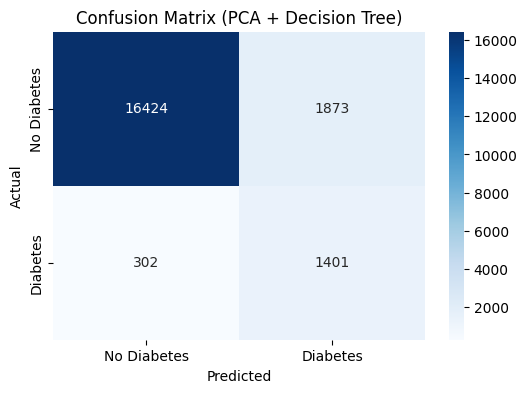

In [2]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Diabetes', 'Diabetes'],
            yticklabels = ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (PCA + Decision Tree)')
plt.show()

### This shows how well the model predicted who has diabetes and who doesn't.

*   True Positives - 1401 people with diabetes were correctly predicted to have it.
*   True Negatives - 16424 people without diabetes were correctly predicted to not have it.
*   False Positives - 1873 people without diabetes were wrongly predicted to have it.
*   False Negatives - 302 people with diabetes were wrongly predicted to not have it.

### The model is really good at identifying people without diabetes (89.76% accuracy), but also fairly accurate at finding those with diabetes (82.27% accuracy).

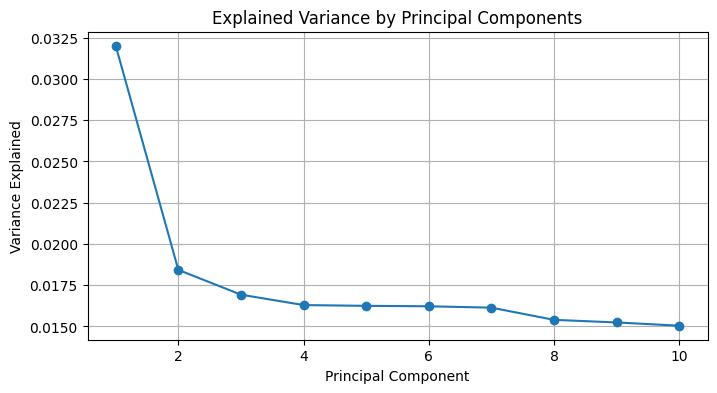

In [3]:
plt.figure(figsize = (8, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_, marker = 'o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

### According to this chart, the first dot is the highest, which means the first Principal Component captures the most important information or has the most influence in explaining the differences in the data.

### As you move to the right, the line drops down. This means that each subsequent Principal Component captures less and less of the important information. By the time you get to the later components (7, 8, 9, 10), they explain very little of the original data's variability.

### So, this chart shows you can most likely get away with using just the first few Principal Components because they hold most of the valuable information, and the later onces don't add much more. This can help simplify our analysis without losing too much important details.